In [1]:
%matplotlib inline

import numpy as np
#from tifffile import imread, imsave
import cv2
from glob import glob
#import tqdm
from matplotlib import pyplot as plt
from sklearn.feature_extraction import image
import skimage.io as io
from skimage import util
import datetime, os


#Load TensorBoard notebook extension
#%load_ext tensorboard


## Preparing data 

In [3]:
#Load the data to use
X = sorted(glob("../dataTraining/images/*.tif"))
Y = sorted(glob("../dataTraining/bw/*.tif"))
#Y = sorted(glob("dataTraining/gt/*.tiff")) #low learning
#Y = sorted(glob("dataTraining/label/*.tif")) #wrong size

print('original:', len(X), 'mask:', len(Y))

original: 122 mask: 122


In [4]:
#map the images to the list. Replaces for loop, takes a list and applies a function to each element
#X = list(map(io.imread,X))
X = list(map(lambda x: util.img_as_ubyte(io.imread(x)), X))
Y = list(map(io.imread,Y))
#Y = list(map(lambda y: io.imread(y,as_gray=True), Y))
#Y = list(map(lambda y: util.img_as_ubyte(io.imread(y)), Y))
#Y = list(map(lambda y: transform.resize(io.imread(y), (2048,2048)), Y))

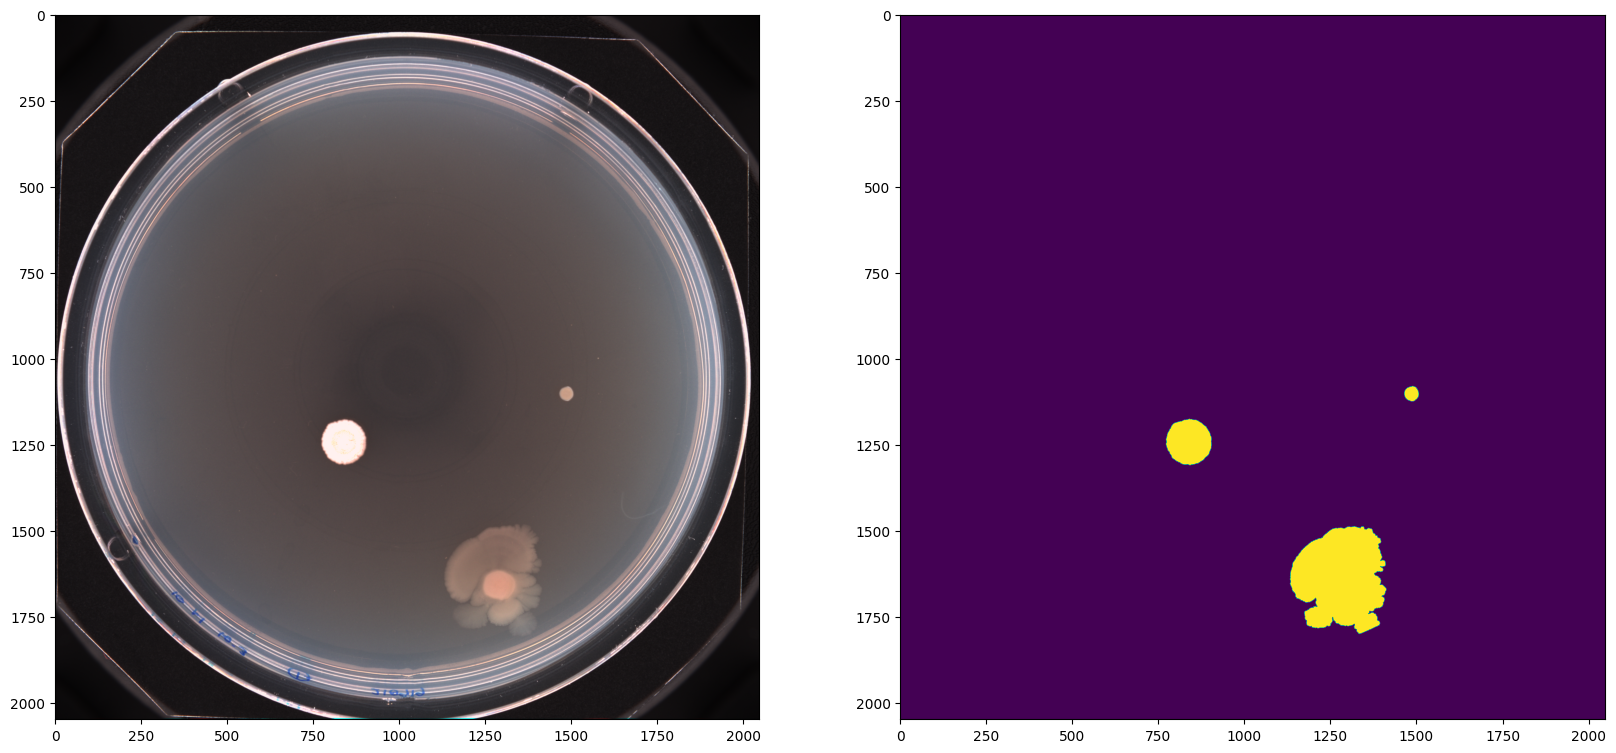

In [5]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(X[0])
ax[1].imshow(Y[0]);

In [6]:
#merged_image = np.concatenate((X[0], Y[0]), axis=1)
#plt.imshow(merged_image)
X[0].shape, Y[0].shape

((2048, 2048, 3), (2048, 2048))

In [69]:
#Split the data
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
#Pick the percetange to be remove and use as test
n_test = int(round(0.05*len(X)))
ind_pretrn, ind_test = ind[:-n_test], ind[-n_test:]
X_test, Y_test = [X[i] for i in ind_test] , [Y[i] for i in ind_test]
X_pretrn, Y_pretrn = [X[i] for i in ind_pretrn] , [Y[i] for i in ind_pretrn]
print('number of images: %3d' % len(X))
print('- training+validation:       %3d' % len(X_pretrn))
print('- test:     %3d' % len(X_test))

number of images: 122
- training+validation:       116
- test:       6


In [70]:
%pwd

'/Users/garciada/Library/CloudStorage/OneDrive-Chalmers/Documents/2024_1_Learning/Segmentation-ML-git'

In [71]:
# #Run only when folders do not exist
# %mkdir training
# %mkdir training/images
# %mkdir training/label
# %mkdir validation
# %mkdir validation/images
# %mkdir validation/label
# %mkdir test 
# %mkdir test/images
# %mkdir test/label

In [72]:
#Save images to use as tests after training and validation
for i in range(len(X_test)):
    io.imsave('dataTraining/test/images/' +str(i)+ '.png', X_test[i])
    io.imsave('dataTraining/test/label/' +str(i)+ '.png', Y_test[i])
    #io.imsave('dataTraining/test/images/' +str(i)+ '.tif', X_test[i])
    #io.imsave('dataTraining/test/label/'+str(i)+'.tif', Y_test[i])

/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/943555418.py:4: UserWarning: dataTraining/test/label/4.png is a low contrast image
  io.imsave('dataTraining/test/label/' +str(i)+ '.png', Y_test[i])


In [73]:
X_test[0].shape, Y_test[0].shape

((2048, 2048, 3), (2048, 2048))

In [74]:
print("original", np.any(np.isnan(X[0])))
print("mask", np.any(np.isnan(Y[0])))


original False
mask False


In [75]:
rng = np.random.RandomState(42)
#Generates a random permutation on integers from 0 to len(X_pretrn)
ind = rng.permutation(len(X_pretrn))
n_val = int(round(0.25 * len(X_pretrn)))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X_pretrn[i] for i in ind_val]  , [Y_pretrn[i] for i in ind_val]
X_train, Y_train = [X_pretrn[i] for i in ind_train]  , [Y_pretrn[i] for i in ind_train]
print('number of images: %3d' % len(X_pretrn))
print('- training:       %3d' % len(X_train))
print('- validation:     %3d' % len(X_val))

number of images: 116
- training:        87
- validation:      29


In [76]:
#Save images to use as training
for i in range(len(X_train)):
    io.imsave('dataTraining/train/images/' +str(i)+ '.png', X_train[i])
    io.imsave('dataTraining/train/label/'+str(i)+'.png', Y_train[i])

/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/3176047438.py:4: UserWarning: dataTraining/train/label/1.png is a low contrast image
  io.imsave('dataTraining/train/label/'+str(i)+'.png', Y_train[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/3176047438.py:4: UserWarning: dataTraining/train/label/2.png is a low contrast image
  io.imsave('dataTraining/train/label/'+str(i)+'.png', Y_train[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/3176047438.py:4: UserWarning: dataTraining/train/label/5.png is a low contrast image
  io.imsave('dataTraining/train/label/'+str(i)+'.png', Y_train[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/3176047438.py:4: UserWarning: dataTraining/train/label/7.png is a low contrast image
  io.imsave('dataTraining/train/label/'+str(i)+'.png', Y_train[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/3176047438.py:4: UserWarning: dataTraining/train/label/17.png is a 

In [77]:
X_train[0].shape, Y_train[0].shape

((2048, 2048, 3), (2048, 2048))

In [78]:
#Run only when folders do not exist
#%mkdir validation
#%mkdir images
#%mkdir label

In [79]:
#Save images to use validation
for i in range(len(X_val)):
    io.imsave('dataTraining/validation/images/' +str(i)+ '.png', X_val[i])
    io.imsave('dataTraining/validation/label/'+str(i)+'.png', Y_val[i])


/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/2634526120.py:4: UserWarning: dataTraining/validation/label/0.png is a low contrast image
  io.imsave('dataTraining/validation/label/'+str(i)+'.png', Y_val[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/2634526120.py:4: UserWarning: dataTraining/validation/label/5.png is a low contrast image
  io.imsave('dataTraining/validation/label/'+str(i)+'.png', Y_val[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/2634526120.py:4: UserWarning: dataTraining/validation/label/9.png is a low contrast image
  io.imsave('dataTraining/validation/label/'+str(i)+'.png', Y_val[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/2634526120.py:4: UserWarning: dataTraining/validation/label/11.png is a low contrast image
  io.imsave('dataTraining/validation/label/'+str(i)+'.png', Y_val[i])
/var/folders/vx/j3bq_54n6sjfpgm6xlh813mw0000gn/T/ipykernel_66113/2634526120.py:4: UserWarning: data

In [80]:
X_val[0].shape, Y_val[0].shape

((2048, 2048, 3), (2048, 2048))

In [81]:
#np.savez_compressed('dataTraining/train/train_data_n0.npz', X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val)
#np.savez_compressed('dataTraining/test/test_data_n0.npz',X_test=X_test, Y_test=Y_test)

No need to run again, since the data has been splitted and prepared for training.

## Tensorflow

In [82]:
import tensorflow as tf
#AUTOTUNE adjusts dynamically the number of threads used by the operation
AUTOTUNE = tf.data.experimental.AUTOTUNE
print(f"Tensorflow ver. {tf.__version__}")

Tensorflow ver. 2.15.0


In [83]:
#Set seed to have fixed random numbers
SEED=42

#Add the paths
dataset_path = "dataTraining/"
training_data = "train/"
val_data = "validation/"
test_data = "test/"

In [84]:
#check available GPU    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            #handles memory allocation
            tf.config.experimental.set_memory_growth(gpu, True)
            #looks for logical/physical GPUs available  
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Creating our Dataloader

In [85]:
# Image size that we are going to use, when using shape (2048,2048,3)
IMG_SIZE = 256
# Our images are RGB (3 channels)
N_CHANNELS = 3
# Scene Parsing has 2 classes 
N_CLASSES = 3

## Creating a source dataset

In [86]:
import tensorflow_io as tfio

In [87]:
TRAINSET_SIZE = len(glob(dataset_path + training_data + "images/" + "*.png"))
print(f"The Training Dataset contains {TRAINSET_SIZE} images.")

VALSET_SIZE = len(glob(dataset_path + val_data + "images/" "*.png"))
print(f"The Validation Dataset contains {VALSET_SIZE} images.")

TESTSET_SIZE = len(glob(dataset_path + test_data + "images/" "*.png"))
print(f"The Test Dataset contains {TESTSET_SIZE} images.")

The Training Dataset contains 87 images.
The Validation Dataset contains 29 images.
The Test Dataset contains 6 images.


In [88]:
def parse_image(img_path: str) -> dict:
    """Load an image and its annotation (mask) and returning
    a dictionary.

    Parameters
    ----------
    img_path : str
        Image (not the mask) location.

    Returns
    -------
    dict
        Dictionary mapping an image and its annotation.
    """
    # Reading the image, as binary file
    image = tf.io.read_file(img_path)
    #Decodes a tiff-encoded image to a uint8 or uint16 tensor
    #image = tfio.experimental.image.decode_tiff(image)
    #Decodes a PNG-encoded image to a uint8 or uint16 tensor
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.uint8)

    # For one Image path:
    # .../train/training/images/*.tif
    # Its corresponding annotation path is:
    # .../train/training/gt/*.tif
    #Replaces images by label in the path, reads the file and decodes it
    mask_path = tf.strings.regex_replace(img_path, "images", "label")
    mask_path = tf.strings.regex_replace(mask_path, "png", "png") #png files
    #mask_path = tf.strings.regex_replace(mask_path, ".tif", ".tif") #tif files
    mask = tf.io.read_file(mask_path)
    # The masks contain a class index for each pixels
    mask = tf.image.decode_png(mask, channels=3)
    #Convert all 255 values to 1
    mask = tf.where(mask == 255, np.dtype('uint8').type(1), mask) 

    return {'image': image, 'segmentation_mask': mask}

In [89]:
train_dataset = tf.data.Dataset.list_files(dataset_path + training_data + "images/" + "*.png", seed=SEED)
train_dataset = train_dataset.map(parse_image)

val_dataset = tf.data.Dataset.list_files(dataset_path + val_data + "images/" + "*.png", seed=SEED)
val_dataset =val_dataset.map(parse_image)

test_dataset = tf.data.Dataset.list_files(dataset_path + test_data + "images/" + "*.png", seed=SEED)
test_dataset =test_dataset.map(parse_image)

## Extra transformations

In [90]:
@tf.function
def normalize(input_image: tf.Tensor, input_mask: tf.Tensor) -> tuple:
    """Rescale the pixel values of the images between 0.0 and 1.0
    compared to [0,255] originally.

    Parameters
    ----------
    input_image : tf.Tensor
        Tensorflow tensor containing an image of size [SIZE,SIZE,3].
    input_mask : tf.Tensor
        Tensorflow tensor containing an annotation of size [SIZE,SIZE,1].

    Returns
    -------
    tuple
        Normalized image and its annotation.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image, input_mask

@tf.function
def load_image_train(datapoint: dict) -> tuple:
    """Apply some transformations to an input dictionary
    containing a train image and its annotation.

    Notes
    -----
    An annotation is a regular  channel image.
    If a transformation such as rotation is applied to the image,
    the same transformation has to be applied on the annotation also.

    Parameters
    ----------
    datapoint : dict
        A dict containing an image and its annotation.

    Returns
    -------
    tuple
        A modified image and its annotation.
    """
    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

@tf.function
def load_image_test(datapoint: dict) -> tuple:
    """Normalize and resize a test image and its annotation.

    Notes
    -----
    Since this is for the test set, we don't need to apply
    any data augmentation technique.

    Parameters
    ----------
    datapoint : dict
        A dict containing an image and its annotation.

    Returns
    -------
    tuple
        A modified image and its annotation.
    """
    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [91]:
BATCH_SIZE = 1

# for reference about the BUFFER_SIZE in shuffle:
# https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle
BUFFER_SIZE = 1000

dataset = {"train": train_dataset, "val": val_dataset}

# -- Train Dataset --#
#it already includes data augmentation
dataset['train'] = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset['train'] = dataset['train'].shuffle(buffer_size=BUFFER_SIZE, seed=SEED)
dataset['train'] = dataset['train'].repeat()
dataset['train'] = dataset['train'].batch(BATCH_SIZE)
dataset['train'] = dataset['train'].prefetch(buffer_size=AUTOTUNE)

#-- Validation Dataset --#
dataset['val'] = dataset['val'].map(load_image_test)
dataset['val'] = dataset['val'].repeat()
dataset['val'] = dataset['val'].batch(BATCH_SIZE)
dataset['val'] = dataset['val'].prefetch(buffer_size=AUTOTUNE)

print(dataset['train'])
print(dataset['val'])

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>


# Visualizing dataset

In [92]:
def display_sample(display_list):
    """Show side-by-side an input image,
    the ground truth and the prediction.
    """
    plt.figure(figsize=(18, 18))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

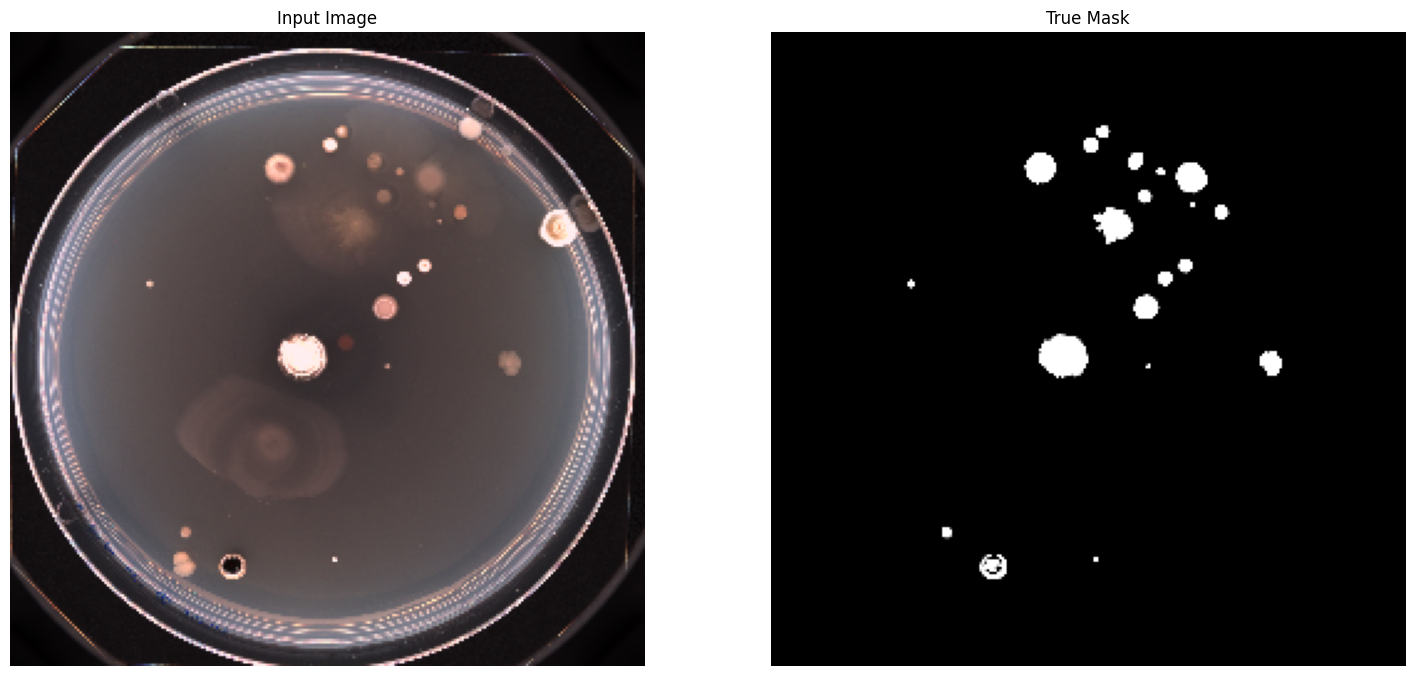

In [93]:
for image, mask in dataset['train'].take(1):
    sample_image, sample_mask = image, mask

#sample_image.shape, sample_mask.shape
display_sample([sample_image[0], sample_mask[0]])

In [94]:
print("original", sample_image[0].shape)
print("mask", sample_mask[0].shape)

original (256, 256, 3)
mask (256, 256, 3)


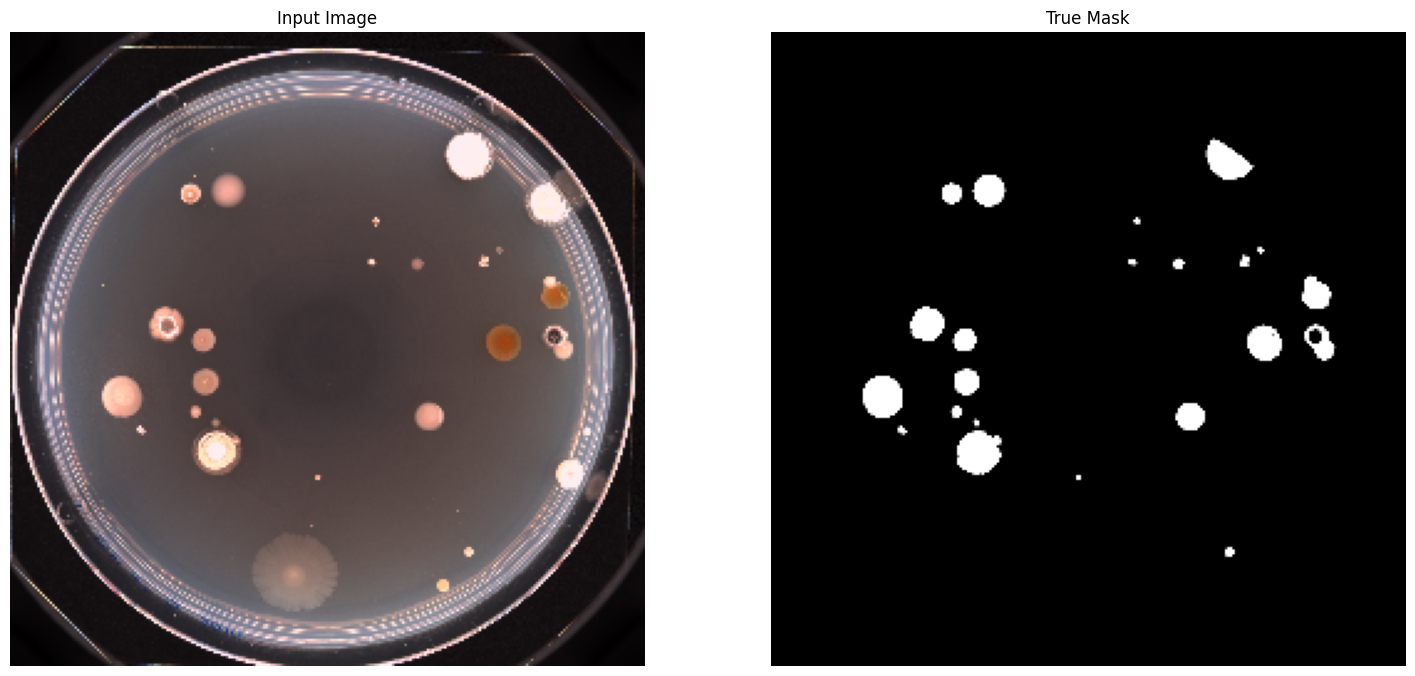

In [95]:
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask

#sample_image.shape, sample_mask.shape
display_sample([sample_image[0], sample_mask[0]])

In [96]:
print("original", sample_image[0].shape)
print("mask", sample_mask[0].shape)

original (256, 256, 3)
mask (256, 256, 3)


# Implementation

In [97]:
import tensorflow.keras
from tensorflow.keras import Input 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers.legacy import Adam


In [98]:
# -- Keras Functional API -- #
# -- UNet Implementation -- #
# Everything here is from tensorflow.keras.layers
# I imported tensorflow.keras.layers * to make it easier to read
# dropout regularization technique where randomly selected neurons are ignored during training, prevents overfitting
dropout_rate = 0.5
#size of image
input_size = (IMG_SIZE, IMG_SIZE, N_CHANNELS)

# If you want to know more about why we are using `he_normal`:
# https://stats.stackexchange.com/questions/319323/whats-the-difference-between-variance-scaling-initializer-and-xavier-initialize/319849#319849  
# Or the excellent fastai course:
# https://github.com/fastai/course-v3/blob/master/nbs/dl2/02b_initializing.ipynb
initializer = 'he_normal'


# -- Encoder -- #
# Block encoder 1
inputs = Input(shape=input_size)
conv_enc_1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer=initializer)(inputs)
conv_enc_1 = Conv2D(64, 3, activation = 'relu', padding='same', kernel_initializer=initializer)(conv_enc_1)

# Block encoder 2
max_pool_enc_2 = MaxPooling2D(pool_size=(2, 2))(conv_enc_1)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_2)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_2)

# Block  encoder 3
max_pool_enc_3 = MaxPooling2D(pool_size=(2, 2))(conv_enc_2)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_3)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_3)

# Block  encoder 4
max_pool_enc_4 = MaxPooling2D(pool_size=(2, 2))(conv_enc_3)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_4)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_4)
# -- Encoder -- #

# ----------- #
# maxpooling allows the network to learn increasingly abstract features at each layer
maxpool = MaxPooling2D(pool_size=(2, 2))(conv_enc_4)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(maxpool)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv)
# ----------- #

# -- Decoder -- #
# Block decoder 1
up_dec_1 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv))
merge_dec_1 = concatenate([conv_enc_4, up_dec_1], axis = 3)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_1)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_1)

# Block decoder 2
up_dec_2 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_1))
merge_dec_2 = concatenate([conv_enc_3, up_dec_2], axis = 3)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_2)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_2)

# Block decoder 3
up_dec_3 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_2))
merge_dec_3 = concatenate([conv_enc_2, up_dec_3], axis = 3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_3)

# Block decoder 4
up_dec_4 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_3))
merge_dec_4 = concatenate([conv_enc_1, up_dec_4], axis = 3)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_4)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
conv_dec_4 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
# -- Dencoder -- #

output = Conv2D(N_CLASSES, 1, activation = 'softmax')(conv_dec_4)

In [99]:
model = tf.keras.Model(inputs = inputs, outputs = output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

## Sanity check prediction

In [100]:
def create_mask(pred_mask: tf.Tensor) -> tf.Tensor:
    """Return a filter mask with the top 1 predictions
    only.

    Parameters
    ----------
    pred_mask : tf.Tensor
        A [IMG_SIZE, IMG_SIZE, N_CLASS] tensor. For each pixel we have
        N_CLASS values (vector) which represents the probability of the pixel
        being these classes. Example: A pixel with the vector [0.0, 0.0, 1.0]
        has been predicted class 2 with a probability of 100%.

    Returns
    -------
    tf.Tensor
        A [IMG_SIZE, IMG_SIZE, 1] mask with top 1 predictions
        for each pixels.
    """
    # pred_mask -> [IMG_SIZE, SIZE, N_CLASS]
    # 1 prediction for each class but we want the highest score only
    # so we use argmax
    pred_mask = tf.argmax(pred_mask, axis=-1)
    # pred_mask becomes [IMG_SIZE, IMG_SIZE]
    # but matplotlib needs [IMG_SIZE, IMG_SIZE, 1]
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    return pred_mask


def show_predictions(dataset=None, num=1):
    """Show a sample prediction.

    Parameters
    ----------
    dataset : [type], optional
        [Input dataset, by default None
    num : int, optional
        Number of sample to show, by default 1
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display_sample([image[0], mask[0], create_mask(pred_mask)])
    else:
        # The model is expecting a tensor of the size
        # [BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3]
        # but sample_image[0] is [IMG_SIZE, IMG_SIZE, 3]
        # and we want only 1 inference to be faster
        # so we add an additional dimension [1, IMG_SIZE, IMG_SIZE, 3]
        one_img_batch = sample_image[0][tf.newaxis, ...]
        # one_img_batch -> [1, IMG_SIZE, IMG_SIZE, 3]
        inference = model.predict(one_img_batch)
        # inference -> [1, IMG_SIZE, IMG_SIZE, N_CLASS]
        pred_mask = create_mask(inference)
        # pred_mask -> [1, IMG_SIZE, IMG_SIZE, 1]
        display_sample([sample_image[0], sample_mask[0],
                        pred_mask[0]])
        
        

1/1 [==============================] - 1s 610ms/step


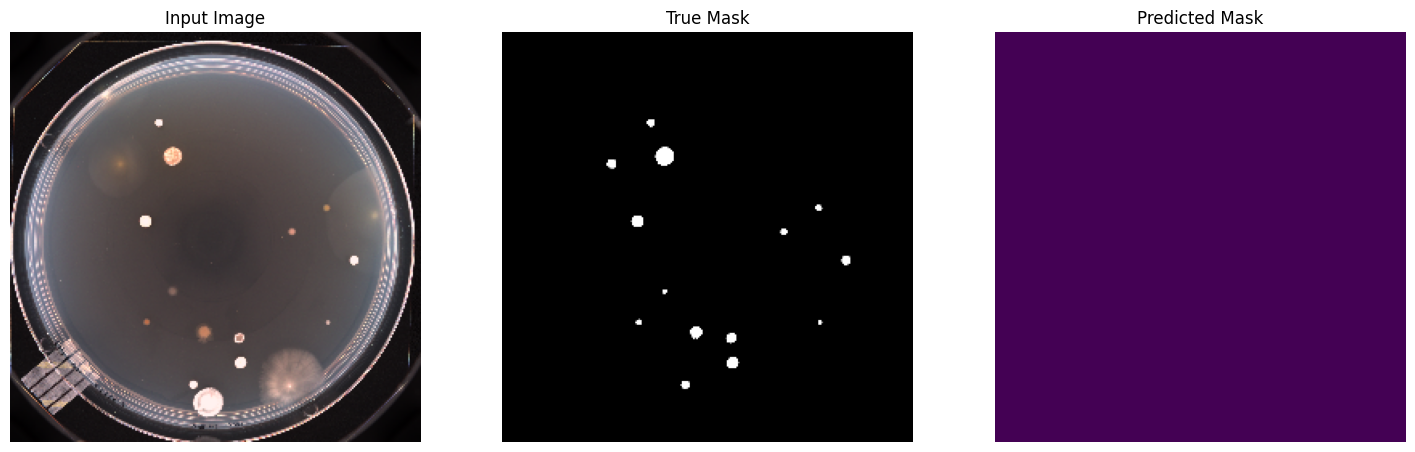

In [101]:
for image, mask in dataset['train'].take(1):
    sample_image, sample_mask = image, mask

show_predictions()

# Train model

The `BATCH_SIZE` parameter in machine learning models, particularly in deep learning, refers to the number of training examples utilized in one iteration. 

In the context of your code, `BATCH_SIZE = 2` means that your model will take in 2 images at a time during training or validation.

Here are some reasons why batching is used:

1. **Memory Usage**: If you have a large dataset, it might not fit into your machine's memory all at once. By dividing the data into smaller batches, you can train on a subset of the data, which reduces the amount of memory needed.

2. **Training Speed**: Training on batches can be faster than training on individual examples because modern libraries can parallelize the operations to run on a GPU.

3. **Convergence**: Batching can help to stabilize training by providing a smoother estimate of the gradient. Instead of updating weights based on one example at a time (which can be noisy), you update based on the average gradient over a batch of examples.

4. **Generalization**: Training on batches adds some noise to the learning process, which can prevent overfitting and help the model generalize better.

Remember, choosing the right batch size is a trade-off. Larger batches can lead to faster training, but too large can exceed your memory or lead to poor generalization. Smaller batches can lead to slower training and noisier gradient estimates, but can sometimes converge faster.



In [102]:
BATCH_SIZE = 4

# for reference about the BUFFER_SIZE in shuffle:
# https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle
BUFFER_SIZE = 1000

dataset = {"train": train_dataset, "val": val_dataset}

# -- Train Dataset --#
#it already includes data augmentation
dataset['train'] = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset['train'] = dataset['train'].shuffle(buffer_size=BUFFER_SIZE, seed=SEED)
dataset['train'] = dataset['train'].repeat()
dataset['train'] = dataset['train'].batch(BATCH_SIZE)
dataset['train'] = dataset['train'].prefetch(buffer_size=AUTOTUNE)

#-- Validation Dataset --#
dataset['val'] = dataset['val'].map(load_image_test)
dataset['val'] = dataset['val'].repeat()
dataset['val'] = dataset['val'].batch(BATCH_SIZE)
dataset['val'] = dataset['val'].prefetch(buffer_size=AUTOTUNE)

print(dataset['train'])
print(dataset['val'])


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>


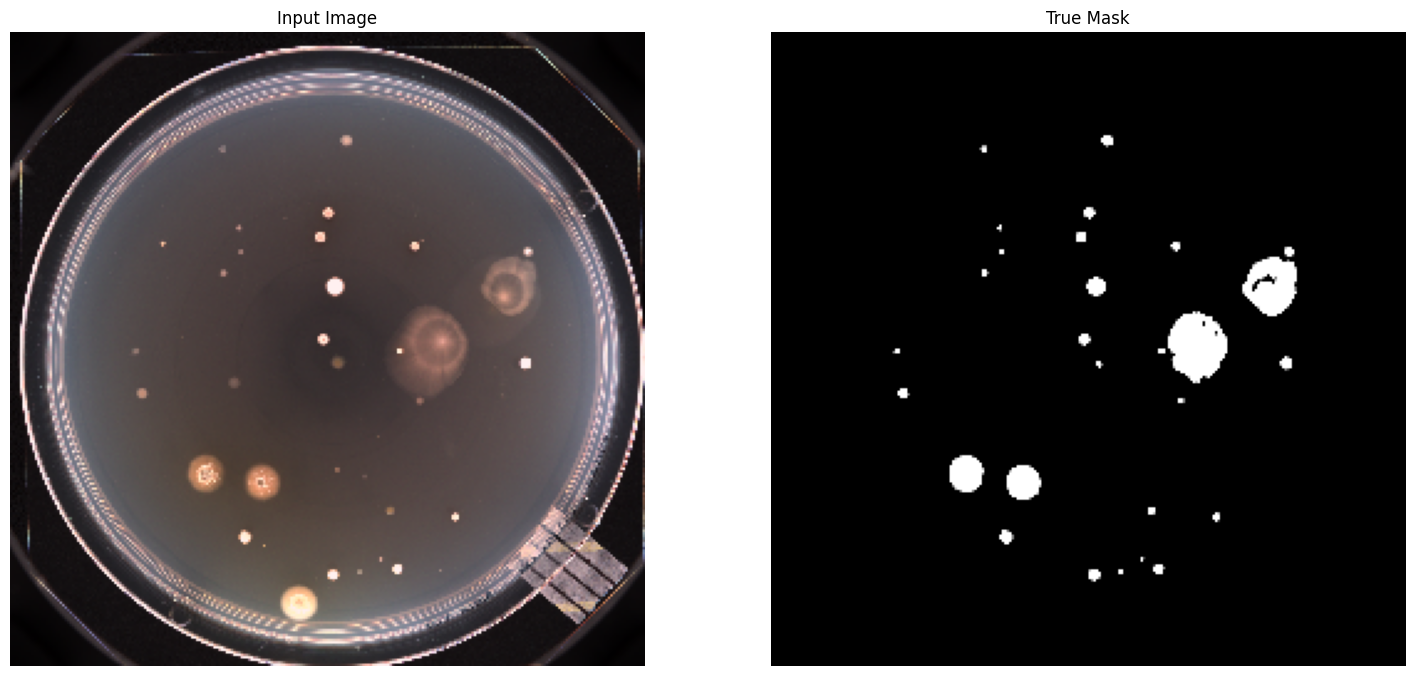

In [103]:
for image, mask in dataset['train'].take(1):
    sample_image, sample_mask = image, mask

#sample_image.shape, sample_mask.shape
display_sample([sample_image[0], sample_mask[0]])

In [104]:
model = tf.keras.Model(inputs = inputs, outputs = output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

## Training
### Simple loop

In [105]:
EPOCHS = 1

STEPS_PER_EPOCH = TRAINSET_SIZE // BATCH_SIZE
VALIDATION_STEPS = VALSET_SIZE // BATCH_SIZE
# sometimes it can be very interesting to run some batches on cpu
# because the tracing is way better than on GPU
# you will have more obvious error message
# but in our case, it takes A LOT of time

# On CPU
# with tf.device("/cpu:0"):
#     model_history = model.fit(dataset['train'], epochs=EPOCHS,
#                               steps_per_epoch=STEPS_PER_EPOCH,
#                               validation_steps=VALIDATION_STEPS,
#                               validation_data=dataset['val'])

# On GPU
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=dataset['val'])

21/21 [==============================] - 20s 528ms/step - loss: 0.0721 - accuracy: 0.9810 - val_loss: 0.0509 - val_accuracy: 1.0000


1/1 [==============================] - 0s 274ms/step


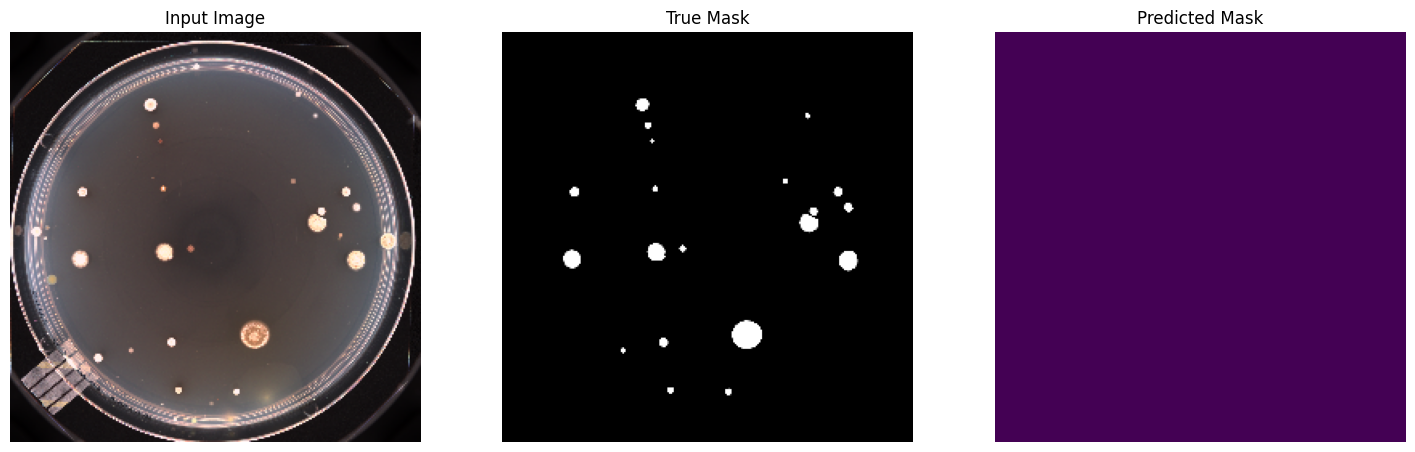

In [106]:
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask
show_predictions()

### Advanced training

In [1]:
model = tf.keras.Model(inputs = inputs, outputs = output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

NameError: name 'tf' is not defined

In [114]:
#suggested by copilot 10-20 epochs
EPOCHS = 50

STEPS_PER_EPOCH = TRAINSET_SIZE // BATCH_SIZE
VALIDATION_STEPS = VALSET_SIZE // BATCH_SIZE
# sometimes it can be very interesting to run some batches on cpu
# because the tracing is way better than on GPU
# you will have more obvious error message
# but in our case, it takes A LOT of time

# On CPU
# with tf.device("/cpu:0"):
#     model_history = model.fit(dataset['train'], epochs=EPOCHS,
#                               steps_per_epoch=STEPS_PER_EPOCH,
#                               validation_steps=VALIDATION_STEPS,
#                               validation_data=dataset['val'])

# On GPU
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=dataset['val'])

Epoch 1/20


21/21 [==============================] - 18s 546ms/step - loss: 0.0687 - accuracy: 0.9931 - val_loss: 0.0504 - val_accuracy: 0.9924
Epoch 2/20
21/21 [==============================] - 12s 569ms/step - loss: 0.0636 - accuracy: 0.9919 - val_loss: 0.0503 - val_accuracy: 0.9907
Epoch 3/20
21/21 [==============================] - 10s 497ms/step - loss: 0.0675 - accuracy: 0.9866 - val_loss: 0.0505 - val_accuracy: 0.9854
Epoch 4/20
21/21 [==============================] - 12s 558ms/step - loss: 0.0656 - accuracy: 0.9843 - val_loss: 0.0512 - val_accuracy: 0.9897
Epoch 5/20
21/21 [==============================] - 10s 496ms/step - loss: 0.0681 - accuracy: 0.9842 - val_loss: 0.0509 - val_accuracy: 0.9849
Epoch 6/20
21/21 [==============================] - 11s 508ms/step - loss: 0.0635 - accuracy: 0.9838 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 7/20
21/21 [==============================] - 11s 514ms/step - loss: 0.0647 - accuracy: 0.9833 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 8/20

In [109]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 66529), started 21:06:00 ago. (Use '!kill 66529' to kill it.)

1/1 [==============================] - 0s 446ms/step


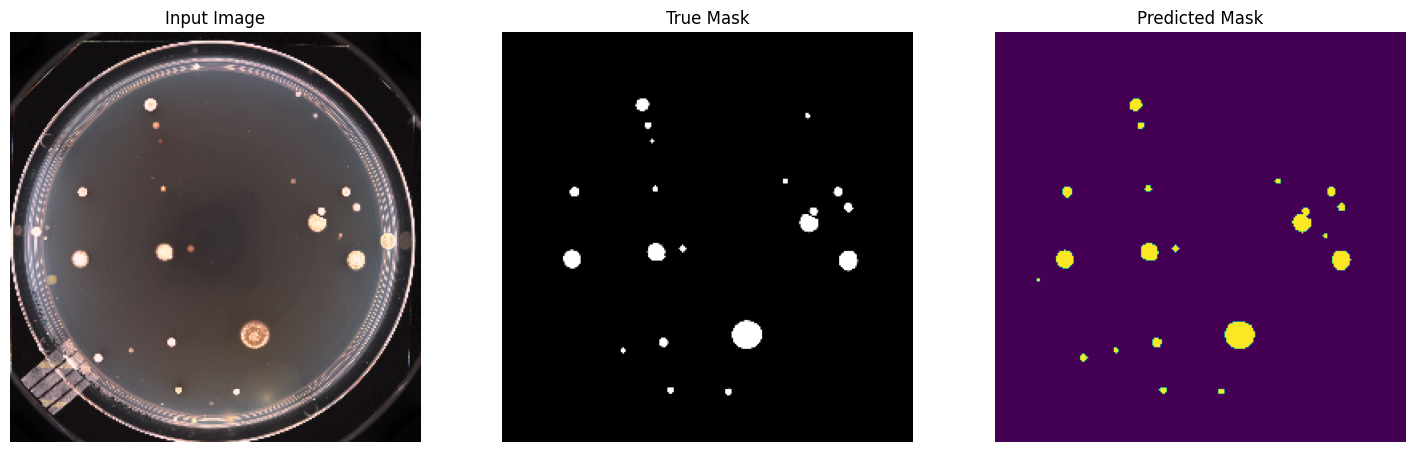

In [115]:
for image, mask in dataset['val'].take(0):
    sample_image, sample_mask = image, mask
show_predictions()


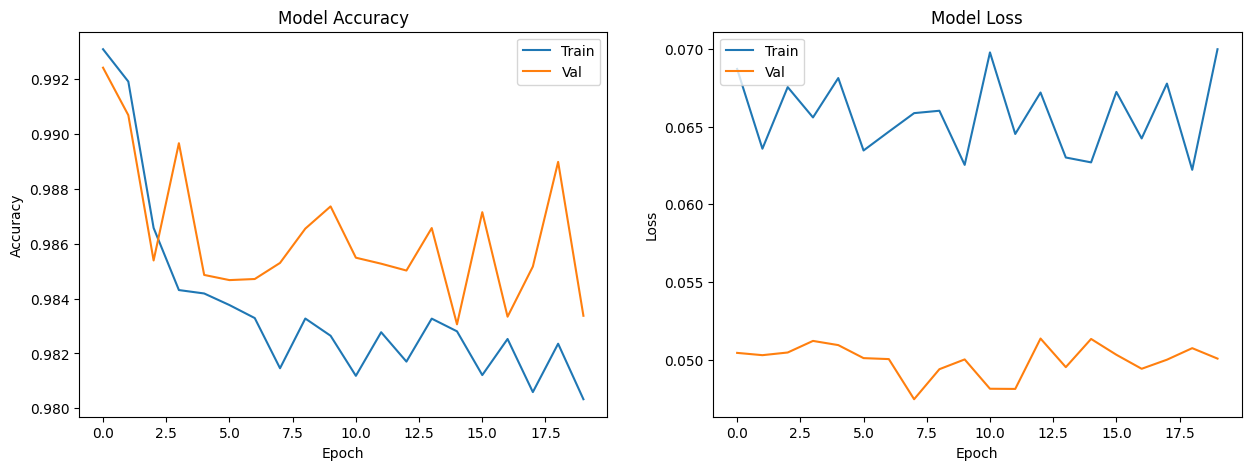

In [116]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax.plot(model_history.history['accuracy'])
ax.plot(model_history.history['val_accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Val'])

ax2 = f.add_subplot(122)
ax2.plot(model_history.history['loss'])
ax2.plot(model_history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'],loc= 'upper left')

plt.show()

In [117]:
model.save('model_122images_GPU_20epochs.h5')

/Users/garciada/anaconda3/envs/tensorflow_env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


So for it seems it has difficulties to find small colonies, could this be due to the low contrast image that I get after loading.